Generating data file path.
File path generation completed.
-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o
dict_items([('tweet_language', en    29
fr     1
Name: tweet_language, dtype: int64), ('tweet_source', Twitter Web App              8
Twitter for iPhone           5
SocialNewsDesk               5
SocialFlow                   2
WordPress.com                2
Zapier.com                   1
Semrush Social Media Tool    1
Sprout Social                1
Echobox                      1
Emplifi                      1
Twitter Media Studio         1
The Tweeted Times            1
Twitter for Android          1
Name: tweet_source, dtype: int64), ('net_score', Neutral     15
Negative    14
Positive     1
Name: net_score, dtype: int64)])
-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-o-x-

,tweet_id,tweet_text,tweet_time,tweet_author_id,tweet_language,retweet_count,reply_count,like_count,quote_count,tweet_source,negative_score,neutral_score,positive_score,net_score
0,1567151913602269184,https://t.co/OuIxTYJjsQ\nAlways good to get im...,2022-09-06 14:05:07+00:00,724633794,en,0,0,0,0,Twitter Web App,0.022226,0.338415,0.639359,Positive
1,1567151655560388608,"🩸 After Roe v. Wade was overturned, US women s...",2022-09-06 14:04:05+00:00,252751061,en,1,0,1,0,SocialFlow,0.439956,0.527343,0.032701,Neutral
2,1567151271232110592,With the overturning of Roe v Wade we will be ...,2022-09-06 14:02:33+00:00,28863408,en,0,0,0,0,Twitter for iPhone,0.117651,0.798251,0.084098,Neutral
3,1567150906902208512,Pro-Lifers cite Christianity to explain anti-a...,2022-09-06 14:01:07+00:00,1329506226900754434,en,0,0,0,0,Zapier.com,0.391924,0.585381,0.022695,Neutral
4,1567150877508501504,The United States is a global outlier for abor...,2022-09-06 14:01:00+00:00,1109933379217252353,en,0,0,0,0,Semrush Social Media Tool,0.896433,0.098928,0.004639,Negative


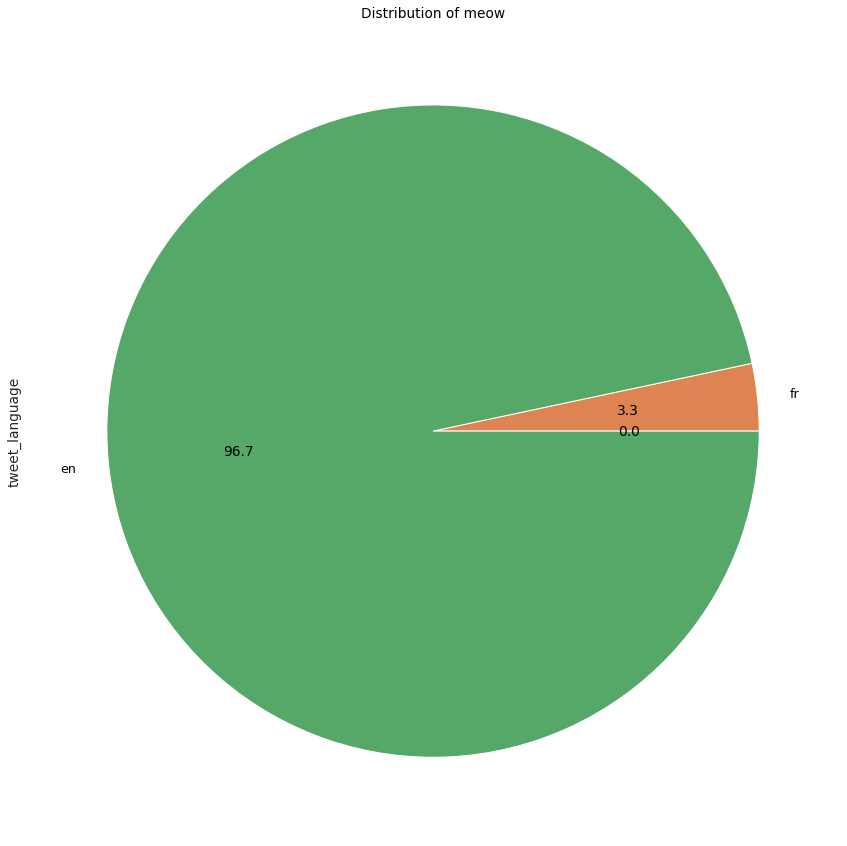

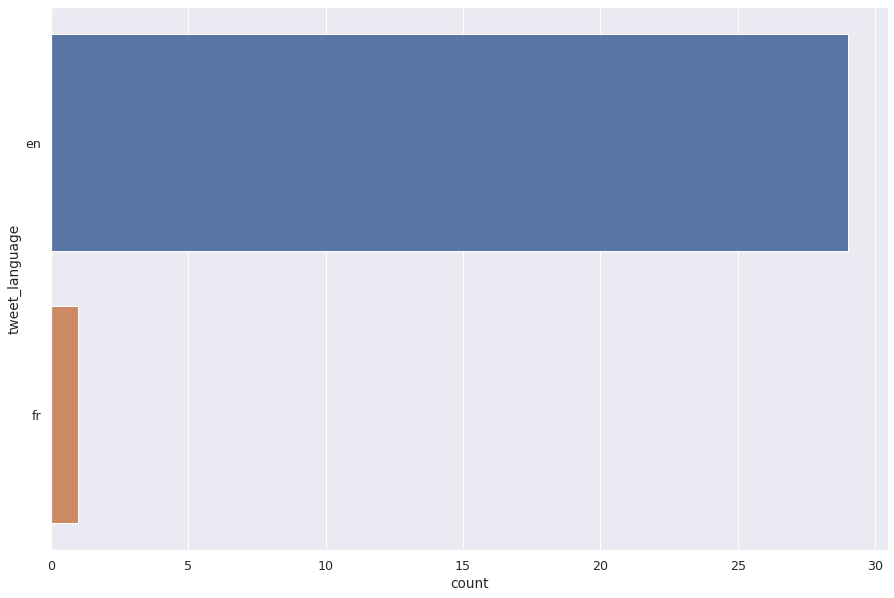

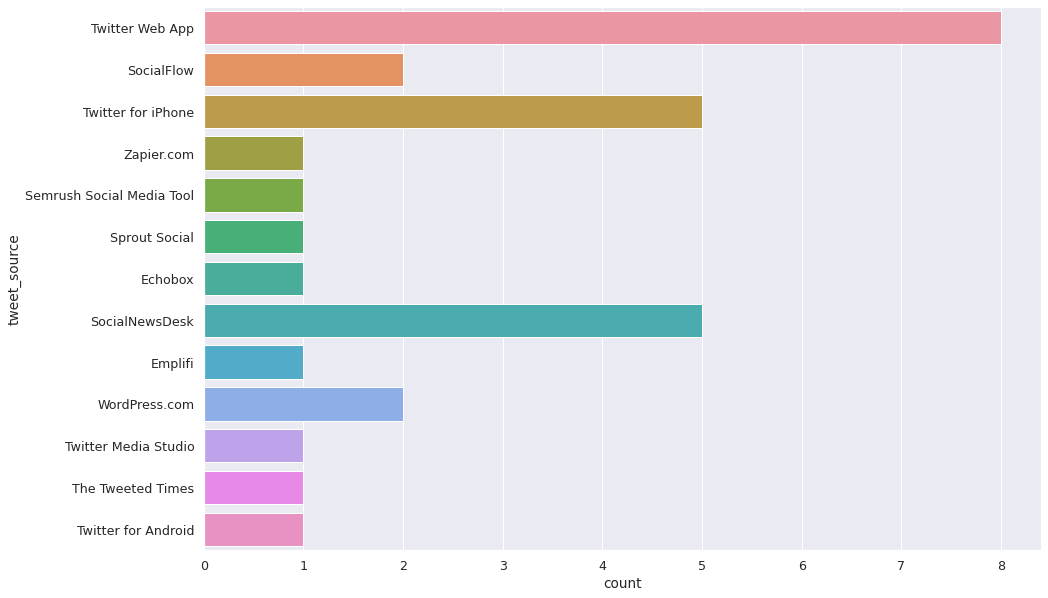

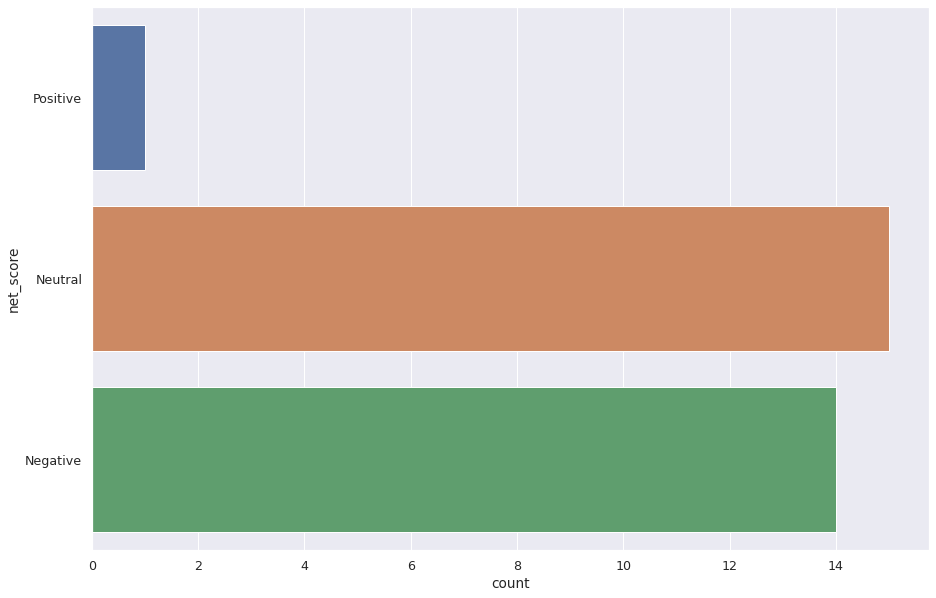

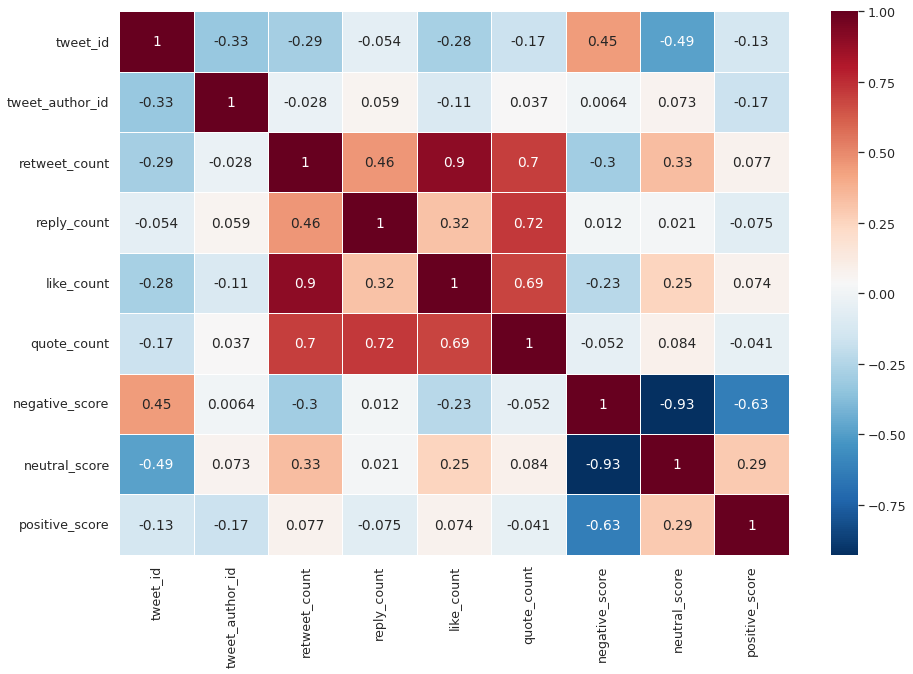

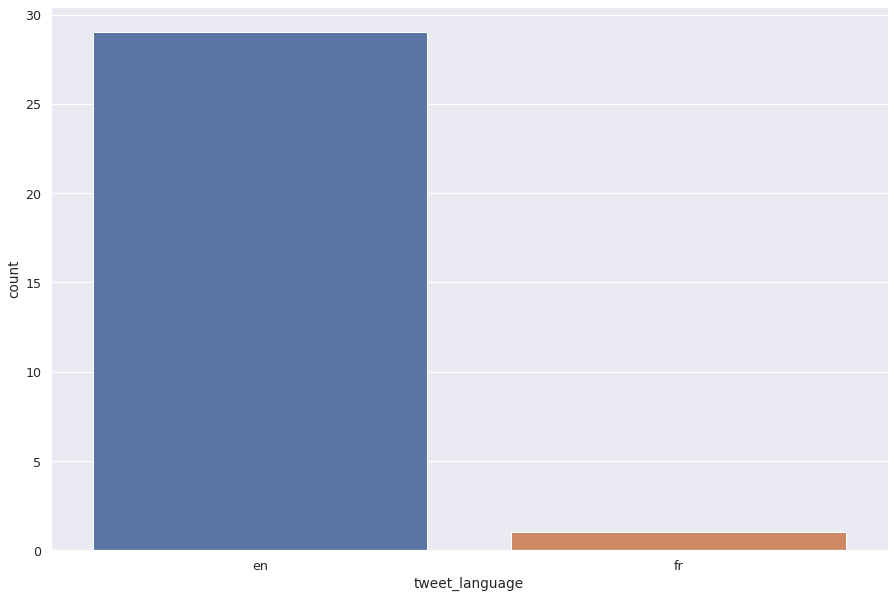

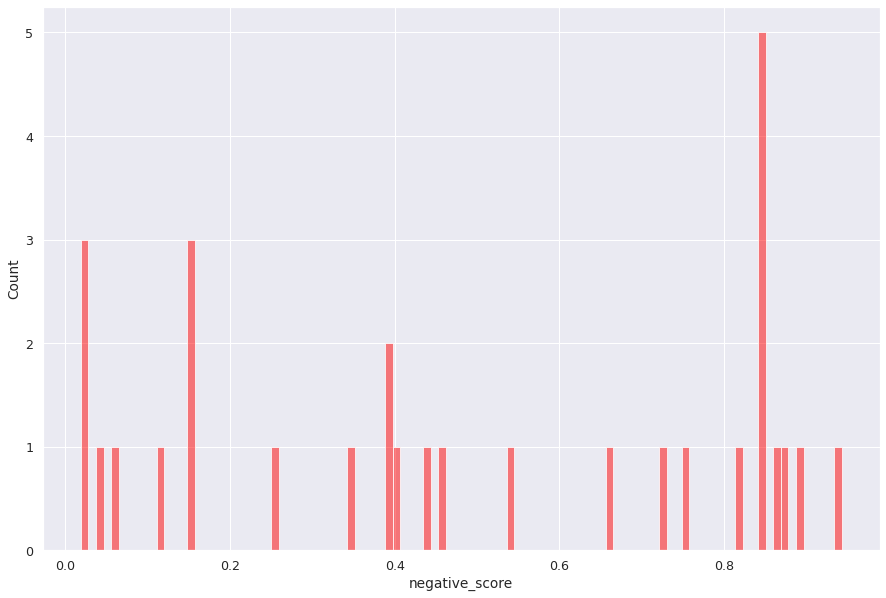

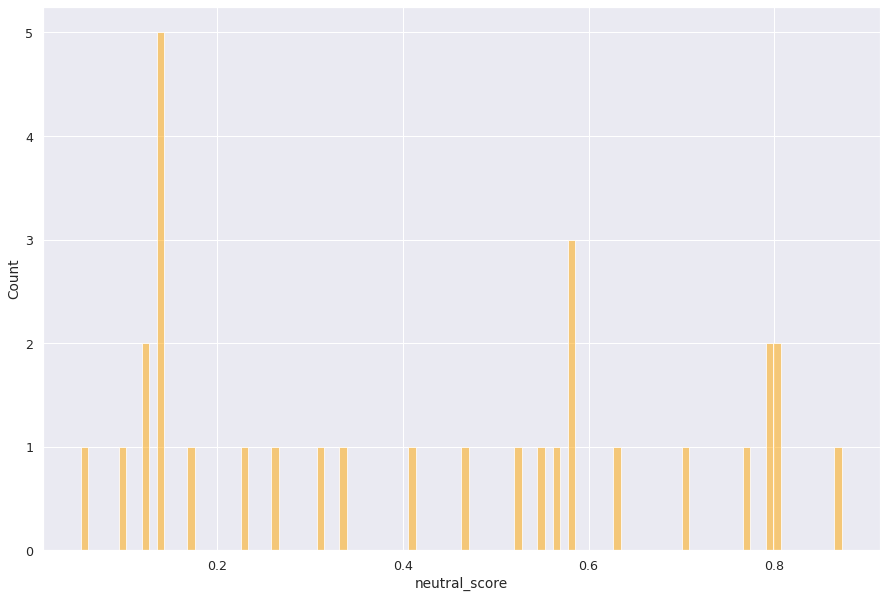

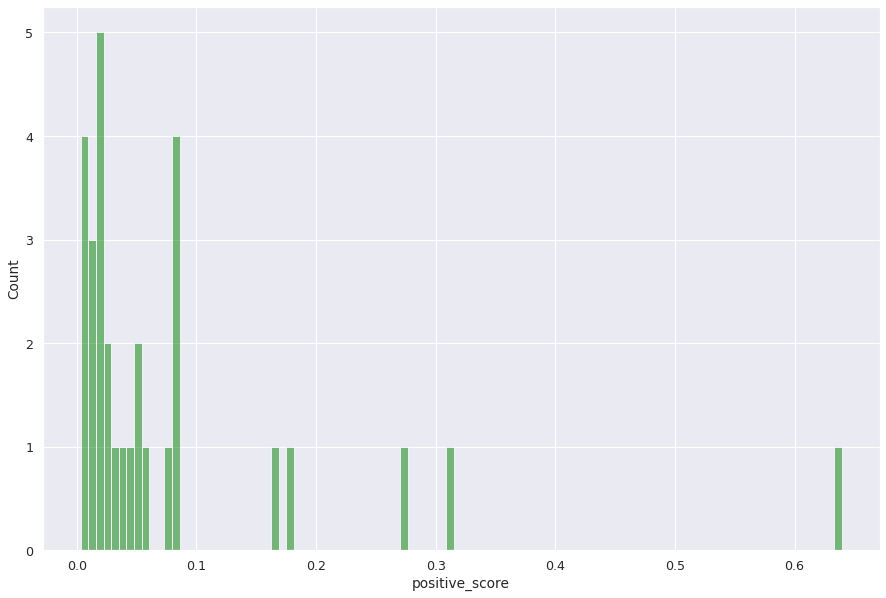

In [15]:
import os, json
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt

# Seaborn configuration/design parameters     
sns.set(rc={"figure.figsize":(15,10),
            "figure.facecolor":"ffffff",
            "text.color":"black"},
            style='darkgrid',
            font_scale=1.15)

def file_path(rel_path, data_file):
    '''
    Form paths using os library and user inputs
    Dependencies - None
    '''
    # Create path to data files
    print("Generating data file path.")
    data_dir = os.path.abspath(rel_path)
    data_path = os.path.join(data_dir,data_file)
    print('File path generation completed.')
    return data_path

# Class attributes and methods
class tweet_analysis:
    '''
    Analysis class for objects containing tweet data, statistics and charts
    '''
    def __init__(self,df):
        self.df = df
        self.series_entries_count=self.count_series_entries()
        self.summary_dictdict = self.summarize_frame()
        self.series_entry_count = self.count_series_entries()
        self.neg_tweet_counts = self.df['negative_score']
        self.pos_tweet_counts = self.df['positive_score']
        self.neut_tweet_counts = self.df['neutral_score']
        self.net_sent_tweet_counts = self.series_entries_count['net_score'].value_counts()
        self.lang_counts = self.series_entries_count['tweet_language'].value_counts()
        self.corr_data = df.corr()
    def summarize_frame(self):
        '''
        Atrributes of the data frame and summary statistics of the data
        Dependencies - None
        '''
        summary_dictdict = (
            {
                'shape' : df.shape, 
                'size' :  df.size,
                'dtypes' : df.dtypes,
                'columns' : df.columns,
                'null_values' : df.isnull().sum(),
                'corr' : df.corr(),
                'prelim_stats' : df.describe()
            }
        )
        return summary_dictdict
    def count_series_entries(self):
        '''
        Count the number of times each pattern occurs in each string column
        eg. Count number of times each language occurs in a collection of tweets
        Dependencies - None
        '''
        series_entry_count = {}
        df_series_lst = list(df.columns[df.dtypes == 'object'])
        exception_lst = ['tweet_id', 'tweet_text']
        for series in df_series_lst:
            if series not in exception_lst:
                series_entry_count[series] = self.df[series].value_counts()
        print('-x-o'*50)
        print(series_entry_count.items())
        print('-x-o'*50)
        return series_entry_count
    def graphs(self, frctnl_lmt):
        '''
        Draw relevant graphs to describe the data
        '''
        def prep_pie_chart_data(pd_series, frctnl_lmt):
            '''
            To prevent overcrowding of pie charts:
            1. Filter data to remove small counts (i.e. categories with small area on pie chart)
            2. What is considered a 'small' area is defined by the user by specifying a threshold percentage (frctnl_lmt)
            3. Values below the threshold value are represented under the category 'Others'
            '''
            pd_series_count = pd_series.sum()
            pd_series_proc = pd_series[pd_series > (frctnl_lmt*pd_series_count)]
            pd_series_proc['Others'] = pd_series[pd_series <= (frctnl_lmt*pd_series_count)].sum()
            pd_series_proc.sort_values(inplace=True)
            print(pd_series_proc)
            return pd_series_proc
        def draw_graphs(lst_pd_series = None,frctnl_lmt = 0, lst_dfs = None):
            '''
            Nested function to draw the graphs
            '''
            def draw_pie_chart(lst_pd_series, frctnl_lmt):
                for pd_series in lst_pd_series:
                    pd_series_proc = prep_pie_chart_data(self.series_entry_count[pd_series], frctnl_lmt)
                    fig, axis = plt.pyplot.subplots()
                    graph_params={'kind':'pie','figsize':(15,15),'autopct':'%.1f','title':"Distribution of meow",'ax':axis}
                    pd_series_proc.plot(**graph_params)
                    # pd_series_proc.plot(kind='pie',
                    #                             figsize=(15,15), 
                    #                             autopct='%.1f',
                    #                             title="Distribution of meow",
                    #                             ax=axis)
            def draw_bar_chart(lst_pd_series):
                for pd_series in lst_pd_series:
                    fig, axis = plt.pyplot.subplots()
                    sns.countplot(data=self.df, y=pd_series)
            def draw_hist_chart():
                color = ['red','blue','green']
                for pd_series in lst_pd_series:
                    fig, axis = plt.pyplot.subbplots()
                    sns.histplot(x= 'negative_score',bins=bins,color=color[i],alpha=0.5,data=self.df,ax=axis)
                
            # Testing
            draw_pie_chart(lst_pd_series=['tweet_language'], frctnl_lmt=0.015)
            draw_bar_chart(lst_pd_series =['tweet_language','tweet_source','net_score'])
        draw_graphs(frctnl_lmt=0.015)
        
        
        
            
        # Data for chart
        summary_dict = self.summarize_frame()
        # print('-o'*50)
        print(type(summary_dict))
        series_entry_count = self.count_series_entries()
        corr = summary_dict['corr']
        # Set up chart objects
        fig = []
        for i in range(0,5,1):
            fig.append(plt.pyplot.subplots()) # automate f1, ax1 = plt.pyplot.subplots()    
        
        # Correlation heat map
        sns.heatmap(corr,
            cmap = 'RdBu_r',
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            linewidth = 0.5,
            annot = True, ax=fig[0][1])
        # Bar graph / count plot
        sns.countplot(data=self.df,x = 'tweet_language',ax=fig[1][1])
        # Histograms
        binwidth = 0.005
        bins=100
        sns.histplot(x= 'negative_score',bins=bins,color='red',alpha=0.5,data=self.df,ax=fig[2][1])
        sns.histplot(x= 'neutral_score',bins=bins,color='orange',alpha=0.5,data=self.df,ax=fig[3][1])
        sns.histplot(x= 'positive_score',bins=bins,color='green',alpha=0.5,data=self.df,ax=fig[4][1])

        
fname = 'test_with_sentiments.json'
df = pd.read_json(file_path("data/", fname))        
# df = pd.read()
a1 = tweet_analysis(df)
a1_summary = a1.summarize_frame()
a1.graphs(0.015)
series_entries_count = a1.count_series_entries()
print('----------------------------------------------------')
print(a1_summary['prelim_stats'])
df.head()


In [10]:
sns.histplot

SyntaxError: invalid syntax (2755830651.py, line 1)